# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Fouad khaled

ID: 58-15677

Tutorial: T-7

---

Name: Nour abdelsalam

ID: 58-15220

Tutorial: T-7

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [8]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

,ApplicationNumber,Age,CreditScore,NumberOfDependents,BankruptcyHistory,PreviousLoanDefaults,JobTenure
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,20500.500000,39.752600,571.612400,1.517300,0.0,0.100050,5.002650
std,5773.647028,11.622713,50.997358,1.386325,0.0,0.300074,2.236804
min,10501.000000,18.000000,343.000000,0.000000,0.0,0.000000,0.000000
25%,15500.750000,32.000000,540.000000,0.000000,0.0,0.000000,3.000000
50%,20500.500000,40.000000,578.000000,1.000000,0.0,0.000000,5.000000
75%,25500.250000,48.000000,609.000000,2.000000,0.0,0.000000,6.000000
max,30500.000000,80.000000,712.000000,5.000000,0.0,1.000000,16.000000


First in the data inspection we wrote a code to show the number of columns and entries the dataset has. We also if there are missing values. There were 3740 missing values for Employment status. 4340 missing values for monthlyloanpayment and 2840 missing values for monthly income. These will be resolved later in data cleaning. We also identified the unique values for columns. We highlighted a problem which will soon be resolved in data cleaning, which is some columns should be numerical, but they are stored as text

## Data Cleaning

In [20]:
# Reload the original dataset to ensure all cleaning steps are applied sequentially in this cell
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')

# --- Data Type Conversions ---
# Clean and convert 'AnnualIncome' to numeric
df['AnnualIncome'] = df['AnnualIncome'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'LoanAmount' to numeric
df['LoanAmount'] = df['LoanAmount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'MonthlyLoanPayment' to numeric
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'MonthlyIncome' to numeric
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'LoanDuration' to numeric
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '', regex=False).astype(int)

# --- Handling Missing Values ---
# Fill missing 'EmploymentStatus' with the mode
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

# Fill missing 'MonthlyLoanPayment' with the median
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].median())

# Fill missing 'MonthlyIncome' with the median
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

# Verify that there are no more missing values
print('Data types and non-null counts after cleaning:')
df.info()
print('\nMissing values after imputation:')
print(df.isnull().sum())

# Display the head of the DataFrame to show the updated table
print('\nUpdated DataFrame head:')
print(df.head())

Data types and non-null counts after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApplicationNumber     20000 non-null  int64  
 1   Age                   20000 non-null  int64  
 2   AnnualIncome          20000 non-null  float64
 3   CreditScore           20000 non-null  int64  
 4   EmploymentStatus      20000 non-null  object 
 5   EducationLevel        20000 non-null  object 
 6   LoanAmount            20000 non-null  float64
 7   LoanDuration          20000 non-null  int64  
 8   MaritalStatus         20000 non-null  object 
 9   NumberOfDependents    20000 non-null  int64  
 10  HomeOwnershipStatus   20000 non-null  object 
 11  BankruptcyHistory     20000 non-null  int64  
 12  LoanPurpose           20000 non-null  object 
 13  PreviousLoanDefaults  20000 non-null  int64  
 14  MonthlyLoanPayment    2

In [10]:
display(df)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,623.110,2249.33,3,No
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1269.040,1902.08,5,No
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,318.570,6324.25,6,No
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,439.185,7674.50,3,No
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,778.360,2973.83,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10710,80,48462.0,656,Employed,Diploma,29111.0,72,Married,4,Rent,0,Vehicle,0,439.185,4034.46,7,No
19996,29352,80,51166.0,641,Unemployed,Doctorate,26447.0,60,Married,0,Rent,0,Vehicle,0,439.185,4034.46,3,No
19997,18749,80,111290.0,565,Employed,Bachelor,28390.0,24,Widowed,1,Other,0,Home Improvement,0,1182.920,9274.17,6,Yes
19998,13396,80,48501.0,676,Employed,Diploma,66707.0,72,Single,4,Mortgage,0,Education,0,926.490,4041.75,6,No


In [11]:
display(df)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,623.110,2249.33,3,No
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1269.040,1902.08,5,No
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,318.570,6324.25,6,No
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,439.185,7674.50,3,No
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,778.360,2973.83,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10710,80,48462.0,656,Employed,Diploma,29111.0,72,Married,4,Rent,0,Vehicle,0,439.185,4034.46,7,No
19996,29352,80,51166.0,641,Unemployed,Doctorate,26447.0,60,Married,0,Rent,0,Vehicle,0,439.185,4034.46,3,No
19997,18749,80,111290.0,565,Employed,Bachelor,28390.0,24,Widowed,1,Other,0,Home Improvement,0,1182.920,9274.17,6,Yes
19998,13396,80,48501.0,676,Employed,Diploma,66707.0,72,Single,4,Mortgage,0,Education,0,926.490,4041.75,6,No


In [21]:
# Convert 'LoanApproved' from 'Yes'/'No' to binary 1/0
df['LoanApproved'] = df['LoanApproved'].map({'Yes': 1, 'No': 0})

print("The 'LoanApproved' column has been converted to binary (1=Yes, 0=No).")

# Display the head of the DataFrame to show the updated column
print('\nUpdated DataFrame head:')
print(df.head())

The 'LoanApproved' column has been converted to binary (1=Yes, 0=No).

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       Married          

In [22]:
# Ensure MonthlyIncome is consistent with AnnualIncome
df['MonthlyIncome'] = df['AnnualIncome'] / 12

print("MonthlyIncome has been updated to be AnnualIncome / 12 for all entries.")

# Display the head of the DataFrame to show the updated table
print('\nUpdated DataFrame head:')
print(df.head())

MonthlyIncome has been updated to be AnnualIncome / 12 for all entries.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       Married        

In the data cleaning we covere several inconsistencies and problems in the dataset. First we converted annual income, loanamount, loanduration, monthlyloanpayment and monthlyincome from object data type to float data type as they are all numbers. Then we handled the missing values by replacing them with mode or median.Employment status was filled with mode. Monthlyloanpayment and monthlyincome were replaced with median. Then we converted binary values of loan approved from yes or no to 0 and 1. Yes if or 1 and 0 is for no.
There was also another inconsistency i noticed which was that the monthly income and annual income were not consistent with eachother which could lead to inaccurate data later on. So we handled this inconsistency by applying this equation in order for data to be consistent  MonthlyIncome = AnnualIncome / 12

## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

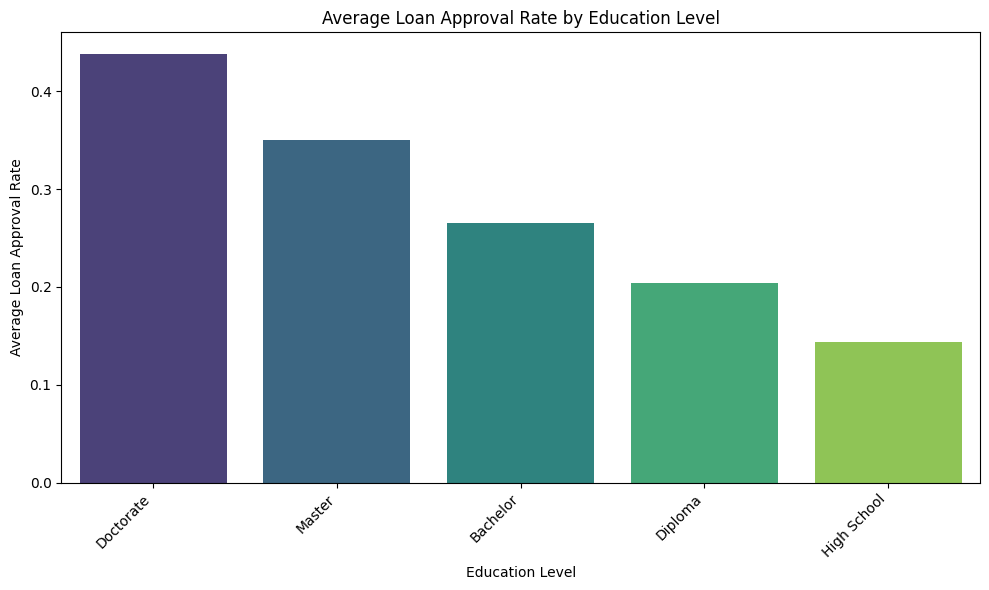

Educational Level Approval Rates:
EducationLevel
Doctorate      0.438226
Master         0.350000
Bachelor       0.265208
Diploma        0.203777
High School    0.143731
Name: LoanApproved, dtype: float64


In [14]:
education_approval_rate = df.groupby('EducationLevel')['LoanApproved'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=education_approval_rate.index, y=education_approval_rate.values, hue=education_approval_rate.index, palette='viridis', legend=False)
plt.title('Average Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Loan Approval Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Educational Level Approval Rates:")
print(education_approval_rate)

**Answer for Q1**: As the graph shows the doctorate education level has the highest level of approval with a precentage of 43.8%. Then comes the Master education level with the second highest approval rate 35%. THirdly is the Bachelor with an approval rate of
26.5%. Fourth is the diploma with 20.4% and the last approval rate was High School with 14.4%.

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

In [15]:
# Filter for approved applicants
approved_applicants_df = df[df['LoanApproved'] == 1]

# Get the AnnualIncome of approved applicants
approved_annual_income = approved_applicants_df['AnnualIncome']

# Calculate quartiles
quartile_25 = approved_annual_income.quantile(0.25)
quartile_50 = approved_annual_income.quantile(0.50) # Median
quartile_75 = approved_annual_income.quantile(0.75)

print(f"25th Percentile (Q1) of Annual Income for Approved Applicants: ${quartile_25:,.2f}")
print(f"50th Percentile (Q2 - Median) of Annual Income for Approved Applicants: ${quartile_50:,.2f}")
print(f"75th Percentile (Q3) of Annual Income for Approved Applicants: ${quartile_75:,.2f}")

# Display descriptive statistics for more context
print("\nDescriptive Statistics for Annual Income of Approved Applicants:")
print(approved_annual_income.describe())

25th Percentile (Q1) of Annual Income for Approved Applicants: $67,367.00
50th Percentile (Q2 - Median) of Annual Income for Approved Applicants: $91,274.00
75th Percentile (Q3) of Annual Income for Approved Applicants: $123,816.00

Descriptive Statistics for Annual Income of Approved Applicants:
count      4745.000000
mean     102173.058166
std       50300.921192
min       15787.000000
25%       67367.000000
50%       91274.000000
75%      123816.000000
max      485341.000000
Name: AnnualIncome, dtype: float64


**Answer for Q2**: From the data shown we can interpret that Q1 is equal to
$67,367 which means that 25% percent of approved applicants have an income that is less than 67,367 and the remaining earn more than this, 75% . Then Q2= $91,274 this means that 50% of approved applicants can have an income less than  91,274 and the other 50% can have more the 91,274. Q3=$123,816 SO 75% of approved applicants have an income of $123,816 or less.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

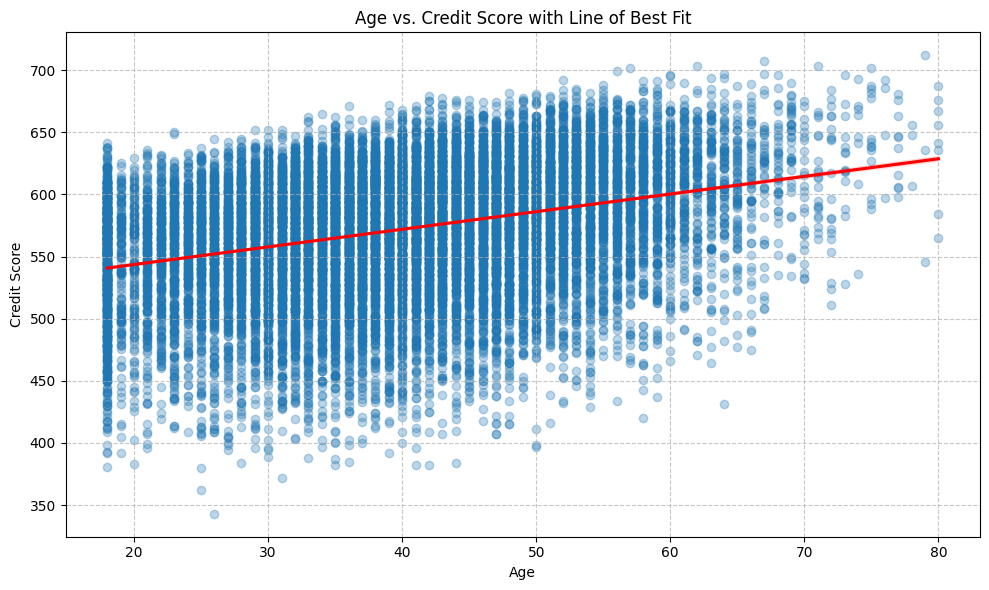

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='CreditScore', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age vs. Credit Score with Line of Best Fit')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Answer for Q3**: The graph shows a line going upward which presents a positive correlation between age and credit score. This means that older applicants have a higher credit score than younger applicants. But it also shows that age is not the only predicotr for credit score and other predictors can be used.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

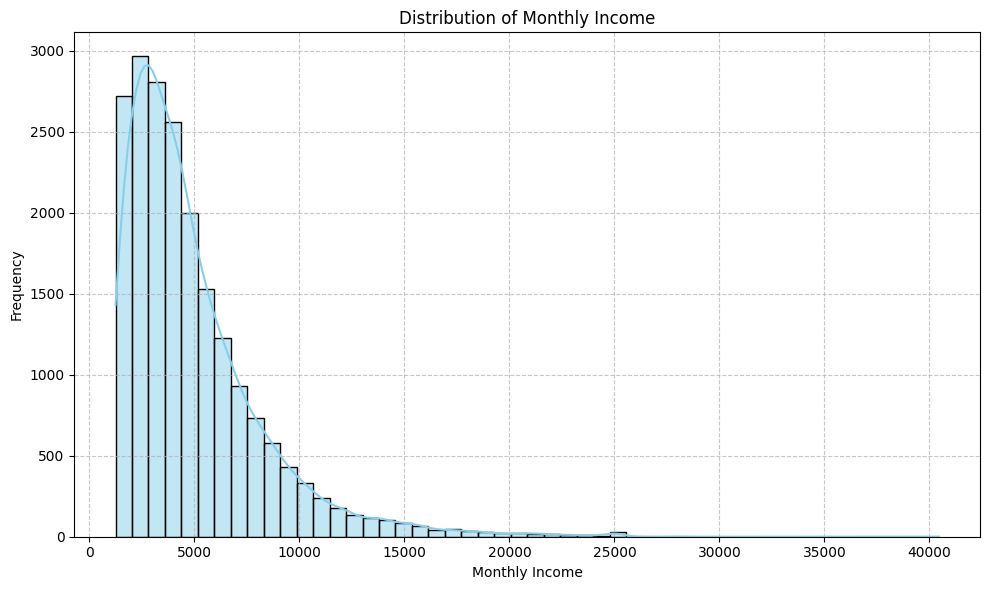

Skewness of Monthly Income distribution: 2.09


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

skewness = df['MonthlyIncome'].skew()
print(f"Skewness of Monthly Income distribution: {skewness:.2f}")

**Answer for Q4**: The skweness calculated is 2.09 which is positive and high. It shows that more people earn moderate to lower incomes . Very few people earn higher incomes.

## Data Preparation for Modelling

### Encoding Categorical Variables

We need to convert categorical features into a numerical format for machine learning models. One-hot encoding is a suitable method for this purpose.

In [18]:
import pandas as pd

categorical_cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding categorical variables:")
print(df_encoded.head())
print(f"\nNew shape of DataFrame: {df_encoded.shape}")

DataFrame after one-hot encoding categorical variables:
   ApplicationNumber  Age  AnnualIncome  CreditScore  LoanAmount  \
0              26231   18       26992.0          586     22432.0   
1              13176   18       22825.0          581     30457.0   
2              27751   18       75891.0          522     30583.0   
3              20628   18       92094.0          565     72738.0   
4              28773   18       35686.0          554     28021.0   

   LoanDuration  NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  \
0            36                   3                  0                     0   
1            24                   0                  0                     0   
2            96                   2                  0                     0   
3            36                   1                  0                     0   
4            36                   3                  0                     0   

   MonthlyLoanPayment  ...  MaritalStatus_Married  Mar

### Defining Features (X) and Target (y)

Next, we'll separate our dataset into features (input variables) and the target variable (what we want to predict).

In [25]:
# Drop 'ApplicationNumber' as it's an identifier and 'LoanApproved' as it's the target
cols_to_drop = ['ApplicationNumber', 'LoanApproved']

# 'ExpectedMonthlyLoanPayment' is an intermediate calculation. Check if it exists before dropping.
if 'ExpectedMonthlyLoanPayment' in df_encoded.columns:
    cols_to_drop.append('ExpectedMonthlyLoanPayment')
else:
    print("Warning: 'ExpectedMonthlyLoanPayment' not found in df_encoded. It might have been dropped earlier or not created before one-hot encoding.")

X = df_encoded.drop(columns=cols_to_drop, axis=1)
y = df_encoded['LoanApproved']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeatures (X) head:")
print(X.head())

Features (X) shape: (20000, 27)
Target (y) shape: (20000,)

Features (X) head:
   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0   18       26992.0          586     22432.0            36   
1   18       22825.0          581     30457.0            24   
2   18       75891.0          522     30583.0            96   
3   18       92094.0          565     72738.0            36   
4   18       35686.0          554     28021.0            36   

   NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  \
0                   3                  0                     0   
1                   0                  0                     0   
2                   2                  0                     0   
3                   1                  0                     0   
4                   3                  0                     0   

   MonthlyLoanPayment  MonthlyIncome  ...  MaritalStatus_Married  \
0             623.110    2249.333333  ...                  False   
1        

In [23]:
annual_interest_rate = 0.08
monthly_interest_rate = annual_interest_rate / 12

# Calculate ExpectedMonthlyLoanPayment using the amortization formula
# M = P [ i(1 + i)^n ] / [ (1 + i)^n – 1]
# P = LoanAmount
# i = monthly_interest_rate
# n = LoanDuration
df['ExpectedMonthlyLoanPayment'] = df.apply(lambda row:
    row['LoanAmount'] * (monthly_interest_rate * (1 + monthly_interest_rate)**row['LoanDuration']) /
    (((1 + monthly_interest_rate)**row['LoanDuration']) - 1)
    if row['LoanDuration'] > 0 else 0, axis=1)

print("The 'ExpectedMonthlyLoanPayment' column has been calculated and added to the DataFrame.")

# Display the head of the DataFrame to show the new column
print('\nUpdated DataFrame head:')
print(df.head())

The 'ExpectedMonthlyLoanPayment' column has been calculated and added to the DataFrame.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36      

In [24]:
df['MonthlyLoanPayment'] = df['ExpectedMonthlyLoanPayment']

print("The 'MonthlyLoanPayment' column has been updated with the calculated expected values.")

# Display the head of the DataFrame to show the updated column
print('\nUpdated DataFrame head:')
print(df.head())

The 'MonthlyLoanPayment' column has been updated with the calculated expected values.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       M

### Splitting Data into Training and Testing Sets

Finally, we'll split our data into training and testing sets to evaluate our model's performance on unseen data.

In [27]:
from sklearn.model_selection import train_test_split

# Check for NaNs in y before splitting
if y.isnull().any():
    print("NaN values found in target variable y. Removing corresponding rows from X and y.")
    # Get indices of non-NaN values in y
    non_nan_indices = y.dropna().index
    X = X.loc[non_nan_indices]
    y = y.loc[non_nan_indices]

    print(f"New X shape after dropping NaNs: {X.shape}")
    print(f"New y shape after dropping NaNs: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

NaN values found in target variable y. Removing corresponding rows from X and y.
New X shape after dropping NaNs: (19930, 27)
New y shape after dropping NaNs: (19930,)
X_train shape: (15944, 27)
X_test shape: (3986, 27)
y_train shape: (15944,)
y_test shape: (3986,)


## Modelling

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and handles L1/L2 regularization

# Train the model
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Training the Logistic Regression model...
Model training complete.
Predictions made on the test set.


## Evaluation

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

# Display classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy of the Logistic Regression model: 0.8853

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      3037
         1.0       0.80      0.69      0.74       949

    accuracy                           0.89      3986
   macro avg       0.85      0.82      0.83      3986
weighted avg       0.88      0.89      0.88      3986


Confusion Matrix:
[[2874  163]
 [ 294  655]]


## Bonus (Optional)

# Task
Train and evaluate a RandomForestClassifier model using the preprocessed training and testing data, then compare its performance metrics (accuracy, classification report, and confusion matrix) against the Logistic Regression model.

## Train RandomForestClassifier

### Subtask:
Initialize and train a RandomForestClassifier model using the training data (X_train, y_train).


**Reasoning**:
First, I need to import the RandomForestClassifier class from sklearn.ensemble, then initialize the model with a random state for reproducibility, and finally train the model using the provided training data (X_train and y_train).



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
print("Training the RandomForestClassifier model...")
rf_model.fit(X_train, y_train)
print("RandomForestClassifier model training complete.")

Training the RandomForestClassifier model...
RandomForestClassifier model training complete.


**Reasoning**:
Now that the RandomForestClassifier model is trained, the next step is to use it to make predictions on the test dataset (X_test) to prepare for evaluation.



In [31]:
y_pred_rf = rf_model.predict(X_test)

print("Predictions made on the test set using RandomForestClassifier.")

Predictions made on the test set using RandomForestClassifier.


**Reasoning**:
To evaluate the RandomForestClassifier model's performance, I need to calculate its accuracy, generate a classification report, and display the confusion matrix, similar to how the Logistic Regression model was evaluated.



In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy for RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the RandomForestClassifier model: {accuracy_rf:.4f}")

# Display classification report for RandomForestClassifier
print("\nClassification Report for RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix for RandomForestClassifier
print("\nConfusion Matrix for RandomForestClassifier:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy of the RandomForestClassifier model: 0.8916

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      3037
         1.0       0.81      0.71      0.76       949

    accuracy                           0.89      3986
   macro avg       0.86      0.83      0.84      3986
weighted avg       0.89      0.89      0.89      3986


Confusion Matrix for RandomForestClassifier:
[[2882  155]
 [ 277  672]]


## Compare Models

### Subtask:
Compare the evaluation metrics of the RandomForestClassifier with those of the previously trained Logistic Regression model, highlighting key differences and insights.


### Model Comparison: Logistic Regression vs. RandomForestClassifier

Let's compare the performance of the Logistic Regression model and the RandomForestClassifier based on their evaluation metrics:

**1. Overall Accuracy:**
*   **Logistic Regression Accuracy:** 0.8853
*   **RandomForestClassifier Accuracy:** 0.8916

The Random Forest model shows a slightly higher overall accuracy compared to Logistic Regression.

**2. Classification Reports:**

**Logistic Regression:**
```
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      3037
         1.0       0.80      0.69      0.74       949

    accuracy                           0.89      3986
   macro avg       0.85      0.82      0.83      3986
weighted avg       0.88      0.89      0.88      3986
```

**RandomForestClassifier:**
```
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      3037
         1.0       0.81      0.71      0.76       949

    accuracy                           0.89      3986
   macro avg       0.86      0.83      0.84      3986
weighted avg       0.89      0.89      0.89      3986
```

**Key Observations from Classification Reports (focusing on class 1: LoanApproved):**
*   **Precision (Class 1):**
    *   Logistic Regression: 0.80
    *   RandomForestClassifier: 0.81
    *   Random Forest has slightly better precision for approved loans, meaning fewer false positives among predicted approved loans.
*   **Recall (Class 1):**
    *   Logistic Regression: 0.69
    *   RandomForestClassifier: 0.71
    *   Random Forest also has better recall for approved loans, indicating it identifies a slightly higher percentage of actual approved loans.
*   **F1-Score (Class 1):**
    *   Logistic Regression: 0.74
    *   RandomForestClassifier: 0.76
    *   The F1-score, which is the harmonic mean of precision and recall, is also higher for Random Forest for class 1, suggesting a better balance between precision and recall.

**3. Confusion Matrices:**

**Logistic Regression:**
```
[[2874  163]
 [ 294  655]]
```
*   True Negatives (TN): 2874 (Correctly predicted not approved)
*   False Positives (FP): 163 (Incorrectly predicted approved when not approved)
*   False Negatives (FN): 294 (Incorrectly predicted not approved when approved)
*   True Positives (TP): 655 (Correctly predicted approved)

**RandomForestClassifier:**
```
[[2882  155]
 [ 277  672]]
```
*   True Negatives (TN): 2882
*   False Positives (FP): 155
*   False Negatives (FN): 277
*   True Positives (TP): 672

**Key Observations from Confusion Matrices:**
*   **True Positives (Class 1):** Random Forest identified 672 actual approved loans, which is more than Logistic Regression (655).
*   **False Negatives (Class 1):** Random Forest had fewer false negatives (277) than Logistic Regression (294), meaning it missed fewer actual approved loans.
*   **False Positives (Class 0):** Random Forest also had slightly fewer false positives (155) than Logistic Regression (163), meaning it incorrectly approved fewer loans.

**4. Conclusion:**

Overall, the **RandomForestClassifier model performs slightly better** than the Logistic Regression model on this dataset. It shows improvements across all key metrics (accuracy, precision, recall, and F1-score), particularly for the 'LoanApproved' (class 1) outcome. Random Forest is better at correctly identifying approved loans (higher TP) and has a lower rate of missing actual approved loans (lower FN), while also making slightly fewer incorrect approvals (lower FP). This indicates a more robust and accurate model for predicting loan approvals.

## Final Task

### Subtask:
Summarize the findings from comparing the two classification models.


## Summary:

### Q&A
The RandomForestClassifier model generally performs slightly better than the Logistic Regression model for predicting loan approvals.

### Data Analysis Key Findings
*   **Overall Accuracy:** The RandomForestClassifier achieved a slightly higher accuracy of 0.8916 compared to the Logistic Regression model's 0.8853.
*   **Precision for Loan Approval (Class 1):** RandomForestClassifier showed a precision of 0.81, marginally better than Logistic Regression's 0.80, indicating fewer false positives among predicted approved loans.
*   **Recall for Loan Approval (Class 1):** RandomForestClassifier had a recall of 0.71, outperforming Logistic Regression's 0.69, meaning it identified a higher percentage of actual approved loans.
*   **F1-Score for Loan Approval (Class 1):** The F1-score for RandomForestClassifier was 0.76, higher than Logistic Regression's 0.74, suggesting a better balance between precision and recall for this class.
*   **True Positives (Loan Approval):** RandomForestClassifier correctly identified 672 approved loans, more than Logistic Regression's 655.
*   **False Negatives (Loan Approval):** RandomForestClassifier had fewer false negatives (277) compared to Logistic Regression (294), missing fewer actual approved loans.
*   **False Positives (Not Loan Approval):** RandomForestClassifier also recorded slightly fewer false positives (155) than Logistic Regression (163), indicating fewer incorrect approvals.

### Insights or Next Steps
*   The RandomForestClassifier is the preferred model for this task due to its consistently better performance across key metrics, particularly in identifying actual loan approvals (higher True Positives and Recall) while maintaining good precision.
*   Further optimization of the RandomForestClassifier through hyperparameter tuning could potentially yield even better performance.
